In [1]:
val test_input = """.......S.......
...............
.......^.......
...............
......^.^......
...............
.....^.^.^.....
...............
....^.^...^....
...............
...^.^...^.^...
...............
..^...^.....^..
...............
.^.^.^.^.^...^.
...............
"""

In [2]:
import java.nio.file.Files
import java.nio.file.Paths

val use_input = true
val seq = if (use_input) {
    Files.readString(Paths.get("input.txt"))
} else {
    test_input
}.trim().split('\n').toList()

In [3]:

fun printStuff(splitters: Array<BooleanArray>, rays: Array<LongArray>) {
    val rows = splitters.size
    val cols = splitters[0].size
    for (y in 0 until rows) {
        for (x in 0 until cols) {
            print(if (rays[y][x] > 0L ) '|' else if (splitters[y][x]) '^' else '.')
        }
        //print(rays[y].filter { it > 0UL}.toList())
        println()
    }
}

In [5]:


val splitters = seq.map { it.toList().map { it == '^' }.toBooleanArray()}.toTypedArray()
val rows = splitters.size
val cols = splitters[0].size
println("rows: $rows, cols: $cols")
val rays = Array(rows) { LongArray(cols) }
rays[0] = seq.first().toList().map { if (it == 'S') 1L else 0L }.toLongArray()
printStuff(splitters,rays)


rows: 142, cols: 141
......................................................................|......................................................................
.............................................................................................................................................
......................................................................^......................................................................
.............................................................................................................................................
.....................................................................^.^.....................................................................
.............................................................................................................................................
....................................................................^.^.^......................................................

In [6]:
var splits = 0
for (i in 1 until rows) {
    val inp = rays[i-1]
    val splt = splitters[i]

    for (j in 0 until cols) {
        if (inp[j]>0L && splt[j]) {
            if (j > 0) rays[i][j-1] += inp[j]
            if (j < cols-1) rays[i][j+1] += inp[j]
            splits++
        } else if (inp[j] > 0L) {
            rays[i][j] += inp[j]
        }
    }
}
printStuff(splitters,rays)


......................................................................|......................................................................
......................................................................|......................................................................
.....................................................................|^|.....................................................................
.....................................................................|.|.....................................................................
....................................................................|^|^|....................................................................
....................................................................|.|.|....................................................................
...................................................................|^|^|^|...................................................................
......

In [7]:
//Part 1 Solution
splits

1628

In [8]:
//Part 2 Solution
rays[rows-1].sum()

27055852018812

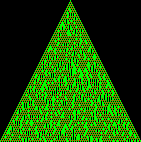

In [11]:
import java.awt.Color
import java.awt.Graphics2D
import java.awt.image.BufferedImage

fun createImage(splitters: Array<BooleanArray>, rays: Array<LongArray>): BufferedImage {
    val imageWidth = splitters[0].size
    val imageHeight = splitters.size
    val image = BufferedImage(imageWidth, imageHeight, BufferedImage.TYPE_INT_RGB)
    val g: Graphics2D = image.createGraphics()

    g.color = Color(0, 0, 0, 255)
    g.fillRect(0, 0, imageWidth, imageHeight)

    for (y in 0 until imageHeight) {
        for (x in 0 until imageWidth) {
            if (rays[y][x] > 0L ) {
                g.color = Color.GREEN
                g.fillRect(x, y, 1, 1)
            } else if (splitters[y][x]) {
                g.color = Color.RED
                g.fillRect(x, y, 1, 1)
            }
        }
    }
    g.dispose()
    return image
}

createImage(splitters, rays)